# 数据分析
在Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集）进行分类模型训练，数据集只有一个文件（diabetes.csv）：Pima Indians Diabetes Dataset 包括根据医疗记录的比马印第安人5 年内糖尿病的发病情况，这是一个两类分类问题。每个类的样本数目数量不均等。一共有 768 个样本，每个样本有8 个输入变量和1 个输出变量。缺失值通常用零值编码。

1) 字段说明  
    Pregnancies： 怀孕次数  
    Glucose： 口服葡萄糖耐受试验中，2 小时的血浆葡萄糖浓度。  
    BloodPressure： 舒张压（mm Hg）  
    SkinThickness： 三头肌皮肤褶层厚度（mm）  
    Insulin：2 小时血清胰岛素含量（μU/ ml）  
    BMI： 体重指数（体重，kg /（身高，m）^ 2）  
2) DiabetesPedigreeFunction： 糖尿病家族史  
3) Age： 年龄（岁）  
    Outcome： 输出变了/类别标签（0 或 1，出现糖尿病为1, 否则为 0）  

## 导入必要工具包

In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
#from sklearn.metrics import log_loss  
#SVM并不能直接输出各类的概率，所以在这个例子中我们用正确率作为模型预测性能的度量
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据 & 数据探索

In [2]:
# 读取数据
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 各属性统计特征
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


从数据的大致取值可以看出，数据没有做脱敏处理，有单位和具体的物理含义，train.info虽然显示没有缺失值，但有些特征数据明显不对，如舒张压和体重等特征都不应该存在零值，（舒张压为0是说明这个人已经挂了么，体重身高比为0）应该是存在缺失值，但直接使用了零值进行填充

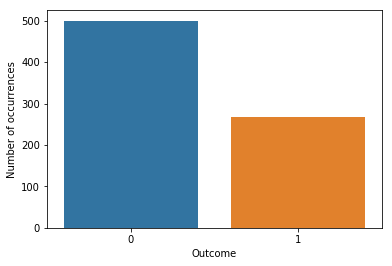

In [5]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(data.Outcome);
pyplot.xlabel('Outcome');
pyplot.ylabel('Number of occurrences');

分类结果中正例的样本约为反例样本的一半多一些，样本不均衡，交叉验证对分类任务缺省的是采用StratifiedKFold，在每折采样时根据各类样本按比例采样

In [6]:
# 单变量分布

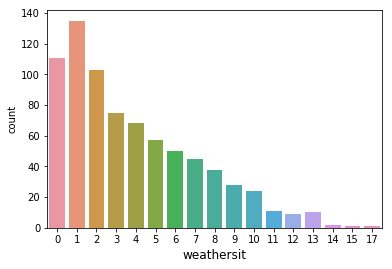

In [7]:
#Pregnancies：离散变量，用countplot
fig = plt.figure()
# sns.distplot(data.weathersit.values, bins=30, kde=False)
sns.countplot(data.Pregnancies.values)
plt.xlabel('weathersit', fontsize=12)
plt.show()

随怀孕次数增多，样本逐渐减少，大多集中在0-2次，十次以上的样本非常少,比较符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


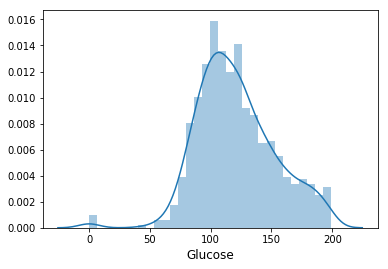

In [8]:
#Glucose
fig = plt.figure()
sns.distplot(data.Glucose.values, bins=30, kde=True)#
plt.xlabel('Glucose', fontsize=12)
#在画板上显示
plt.show()

血浆葡萄糖浓度，正常情况下应该不会出现0值，应该是数据缺失，除了0值，其他的数据大致正态分布，符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


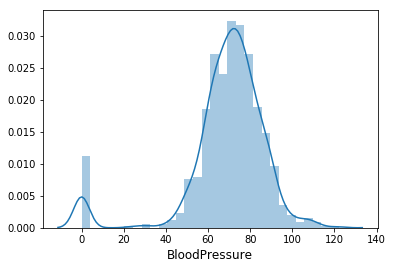

In [9]:
fig = plt.figure()
sns.distplot(data.BloodPressure.values, bins=30, kde=True)
plt.xlabel('BloodPressure', fontsize=12)
#在画板上显示
plt.show()

舒张压也不应该出现0值，除非这个人挂了，其他的数据大致成正态分布，60-80之间属于正常值，人数最多，符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


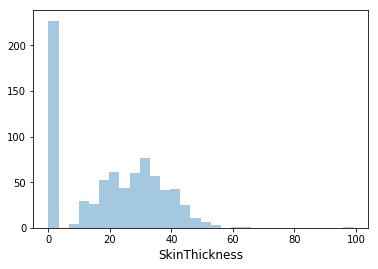

In [10]:
fig = plt.figure()
sns.distplot(data.SkinThickness.values, bins=30, kde=False)
plt.xlabel('SkinThickness', fontsize=12)
#在画板上显示
plt.show()

三头肌皮肤褶层厚度，测量方法大概就是：揪起身上的一块肉（三头肌上的肉），测一下看知道自己是不是肥胖，即使瘦的皮包骨头也不该为0，但数据显示有230左右个0值，说明数据大概有1/3的样本数据缺失，缺失数据太多了，可以考虑去掉这个特征

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


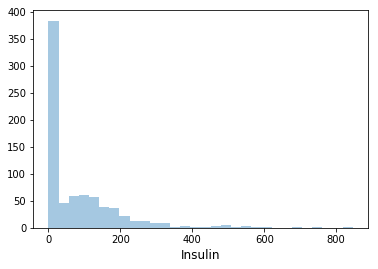

In [11]:
fig = plt.figure()
sns.distplot(data.Insulin.values, bins=30, kde=False)
plt.xlabel('Insulin', fontsize=12)
#在画板上显示
plt.show()

人体血糖水平是动态平衡的，餐后血糖上升，用于降血糖的胰岛素含量也会上升用于调节血糖，故正常人2 小时血清胰岛素含量这个特征应该是在某个区间，但不该为0，上图有一半以上的数据都是0，可以考虑去掉该特征

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


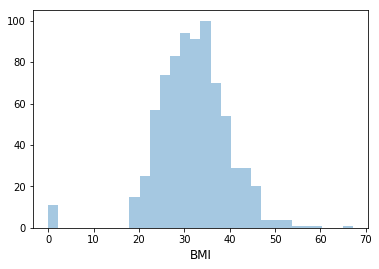

In [12]:
fig = plt.figure()
sns.distplot(data.BMI.values, bins=30, kde=False)
plt.xlabel('BMI', fontsize=12)
#在画板上显示
plt.show()

数据反映被调查人的体重身高比，正常不应为0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


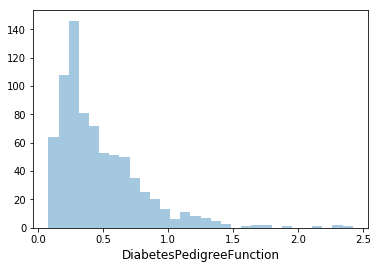

In [13]:
fig = plt.figure()
sns.distplot(data.DiabetesPedigreeFunction.values, bins=30, kde=False)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
#在画板上显示
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


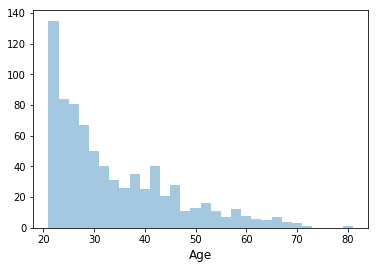

In [14]:
fig = plt.figure()
sns.distplot(data.Age.values, bins=30, kde=False)
plt.xlabel('Age', fontsize=12)
#在画板上显示
plt.show()

反映被调查人的年龄阶段分布

## 数据准备

In [15]:
data = data.drop('SkinThickness', axis=1)
#data = data.drop('Insulin', axis=1)

data.shape

(768, 8)

三头肌皮肤褶层厚度和血清胰岛素两个特征为0值的样本数太多，但不确定是否去除之后更合理些，通过后续模型训练，分别尝试去除看效果如何，但就目前而言，我认为 SkinThickness 这个特征不该出现0值，所以决定先剔除这个特征

In [16]:
for i in range(768):
    if data.Glucose.values[i] == 0:
        data.Glucose.values[i] = 117
    if data.BloodPressure.values[i] == 0:
        data.BloodPressure.values[i] = 72
    if data.BMI.values[i] == 0:
        data.BMI.values[i] = 32
        
data.shape

(768, 8)

从特征工程可看出，有三个特征（血浆葡萄糖浓度、舒张压、体重指数）对应的样本数据存在少部分缺失，其中零值即为缺失值，使用对应特征的中位数进行替换填充，由于读取的数据文件缺失值使用了零值编码，而不是直接空着，无法使用sklearn.preprocessing.Imputer进行填充，故使用循环判断的方式进行填充 

其中中位数如下：  
Glucose ：117  
BloodPressure ：72  
BMI ：32  

In [17]:
# 从原始数据中分离输入特征x和输出y
y = data['Outcome'].values
X = data.drop('Outcome', axis = 1)


In [18]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(614, 7)

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## 数据预处理

In [20]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

## 模型训练

###  Logistic Regression

### 1 default Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print('cv logloss is:', -loss.mean())

logloss of each fold is:  [0.45679707 0.47306945 0.52941982 0.4177863  0.46965247]
cv logloss is: 0.469345022245065


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


使用缺省参数的logistic回归模型，即正则函数penalty='l2',正则参数C=1.0  
使用5折交叉验证来评价模型性能和参数调优，其中评价指标选择neg_log_loss，由于是负数，打印结果进行取反，其中损失值越小越好，最终得出的logloss值为0.469345022245065

In [22]:
lr1 = lr.fit(X_train, y_train)

train_score = lr1.score(X_train, y_train)
test_score = lr1.score(X_test, y_test)

print('the train score is:', train_score)
print('the test score is:', test_score)

the train score is: 0.7866449511400652
the test score is: 0.7272727272727273


缺省参数的logistic回归在测试集上的分数为0.7272727272727273

### 2 正则化的 Logistic Regression及参数调优

目标函数：J = sum(logloss(f(xi), yi)) + C* penalty  

需要调整的超参数：  
1）C 正则系数，一般在log域（取log后的值）均匀设置候选参数  
2）penalty 正则函数（L2/L1）

skilearn中调用方法：置候选参数集合，以字典形式存储，调用GridSearchCV，调用fit

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

查看交叉网格搜索的完整结果（存放在cv_results_中）

In [24]:
# view the complete results (list of named tuples)
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00180073, 0.00120077, 0.00100141, 0.00100131, 0.00100098,
        0.00100069, 0.001401  , 0.00119991, 0.0010004 , 0.00120087,
        0.00100083, 0.00100069, 0.0010006 , 0.00120077]),
 'mean_score_time': array([0.00140238, 0.00079989, 0.0016006 , 0.00080051, 0.00100045,
        0.00100074, 0.00100112, 0.00100179, 0.00100069, 0.00080051,
        0.0010005 , 0.00100083, 0.00100064, 0.00080075]),
 'mean_test_score': array([-0.69314718, -0.63827633, -0.66359655, -0.51918011, -0.47469201,
        -0.46995731, -0.46980389, -0.46940806, -0.47001248, -0.46998406,
        -0.47005862, -0.47005365, -0.47006164, -0.47006074]),
 'mean_train_score': array([-0.69314718, -0.63754022, -0.66249583, -0.51492301, -0.46466921,
        -0.45830275, -0.4538618 , -0.4537296 , -0.45364806, -0.45364673,
        -0.45364583, -0.45364581, -0.4536458 , -0.4536458 ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000

取出交叉搜索得出的最优超参数 C 和 penalty，以及分数

In [25]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.46940805697936966
{'C': 1, 'penalty': 'l2'}


由于C = 1在所设置的候选参数中间，所以以上的候选参数范围不需要变更，若最佳值在候选参数边缘，如0.001或1000，则再尝试更大的候选参数或更小的候选参数，直到找到拐点

In [26]:
lr2 = LogisticRegression(C=1.0, penalty='l2')
lr2 = lr2.fit(X_train, y_train)

train_score = lr2.score(X_train, y_train)
test_score = lr2.score(X_test, y_test)

print('the train score is:', train_score)
print('the test score is:', test_score)

the train score is: 0.7866449511400652
the test score is: 0.7272727272727273


得出最优超参数 C = 1，l2正则，损失为0.46940805697936966，和上面不用参数调优方法的缺省logistic回归得到的损失差不多（0.469345022245065），事实上还差一点点

疑惑：同一个训练集，同样的参数，为什么第二次参数调优得出损失值比第一次直接用缺省参数的损失值还高一点点，不该是一样么？  
猜测：虽然是同一个训练集，但第一次直接用了5折交叉验证，第二次在gridcv中又重新用了一次5折交叉验证，两次交叉验证是独立的，并且都是随机的将训练集划分为5份，因为不是用的不是一模一样的划分，所以造成训练结果有略微的差别，而且GridSearchCV的目的是为了找出多个参数下，损失值相对较低时所对应的的参数，达到此目的就行了。在最终测试集上的结果，两个分数是一样的

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


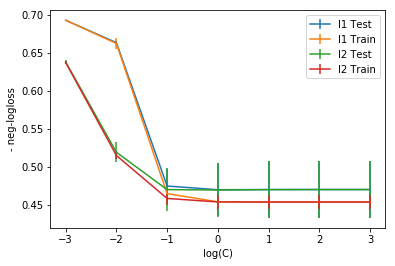

In [27]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = -np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = -np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = -np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = -np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( '- neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

在L1正则和L2正则下，不同的正则参数C对应的模型在训练集上和测试集上的负log损失，可以看出在训练集上C越大（正则越小）的模型性能越好，在测试集上，L2正则和L1正则都是在log(C)为0时，即C=1时性能最好

### 3 用LogisticRegressionCV实现正则化的 Logistic Regression

### 3.1 L1正则

In [28]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [0.01, 0.1, 1, 10, 100]

# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

由缺省参数的logistic回归可得出，L1正则下，最优的正则系数C大概是1左右，故选取的候选区间以1为中心，取五个进行比较

In [29]:
lrcv_L1.scores_

{1: array([[-0.66245427, -0.47689195, -0.45916104, -0.45674872, -0.45652284],
        [-0.66356146, -0.47456724, -0.47276548, -0.47277448, -0.47279726],
        [-0.66119179, -0.50883054, -0.52876052, -0.53303045, -0.53349147],
        [-0.66721469, -0.4376144 , -0.41860586, -0.41747256, -0.41737486],
        [-0.66359927, -0.4752592 , -0.4693966 , -0.46971241, -0.46976839]])}

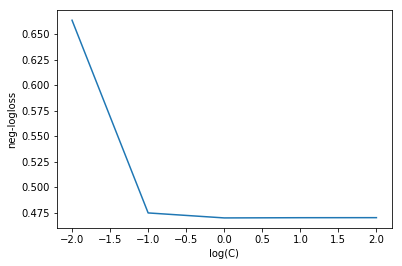

In [30]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
#n_classes = 9
#scores =  np.zeros((n_classes,n_Cs))

#for j in range(n_classes):
#        scores[j][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
scores =  np.zeros((1,n_Cs))
scores[0][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()


In [31]:
print("lrcv_L1_coef:",lrcv_L1.coef_)
print('lrcv_L1_C:',lrcv_L1.C_)

lrcv_L1_coef: [[ 0.4169155   1.13455935 -0.13763942 -0.12840964  0.740076    0.20350331
   0.13142497]]
lrcv_L1_C: [1.]


可以得出，L1正则下，最优的参数C=1

In [32]:
lrcv_L1_train_score = lrcv_L1.score(X_train, y_train)
lrcv_L1_test_score = lrcv_L1.score(X_test, y_test)

print('the lrcv_L1 train score is:', lrcv_L1_train_score)
print('the lrcv_L1 test score is:', lrcv_L1_test_score)

the lrcv_L1 train score is: 0.7833876221498371
the lrcv_L1 test score is: 0.7207792207792207


L1正则下，C=1时训练出的模型在测试集上的分数为0.7207792207792207

### 3.2 L2正则

In [33]:
from sklearn.linear_model import LogisticRegressionCV

#Cs = [1, 10,100,1000]
Cs = [0.001, 0.01, 0.1, 1, 10]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', solver='liblinear', multi_class='ovr')
lrcv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [34]:
lrcv_L2.scores_

{1: array([[-0.63879793, -0.51815689, -0.46213674, -0.45679707, -0.45652485],
        [-0.64010309, -0.5273538 , -0.47779433, -0.47306945, -0.47281708],
        [-0.63994469, -0.53091418, -0.51152388, -0.52941982, -0.53310008],
        [-0.63308469, -0.49417598, -0.42488255, -0.4177863 , -0.41740083],
        [-0.63941407, -0.52515329, -0.47317231, -0.46965247, -0.46975751]])}

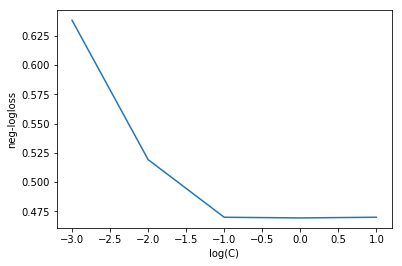

In [35]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
#n_classes = 9
#scores =  np.zeros((n_classes,n_Cs))

#for j in range(n_classes):
#        scores[j][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
scores =  np.zeros((1,n_Cs))
scores[0][:] = -np.mean(lrcv_L2.scores_[1],axis = 0)
    
mse_mean = np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

In [36]:
print("lrcv_L2_coef:",lrcv_L2.coef_)
print('lrcv_L2_C:',lrcv_L2.C_)

lrcv_L2_coef: [[ 0.42068374  1.13824681 -0.15599435 -0.14091092  0.75255179  0.21396659
   0.14405214]]
lrcv_L2_C: [1.]


可以得出，L2正则下，最优的参数C=1

In [37]:
lrcv_L2_train_score = lrcv_L2.score(X_train, y_train)
lrcv_L2_test_score = lrcv_L2.score(X_test, y_test)

print('the lrcv_L2 train score is:', lrcv_L2_train_score)
print('the lrcv_L2 test score is:', lrcv_L2_test_score)

the lrcv_L2 train score is: 0.7866449511400652
the lrcv_L2 test score is: 0.7272727272727273


L2正则下，C=1时训练出的模型在测试集上的分数为0.7272727272727273

上面几个模型在测试集上的分数其实都小于训练集上的参数，一方面可能是因为训练出的模型有一点过拟合，另一方面也有可能是因为数据本身的分类结果是不均衡的，可以试着在LogisticRegressionCV参数里面增加class_weight进行参数调节，以此获得更好的训练模型。关于class_weight的调节，将在SVM中进行设置和尝试